In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [31]:
#loading data
df= pd.read_csv("shot_logs.csv")
print(df.shape)

(128069, 21)


In [32]:
#droping not needed columns
df = df[['SHOT_DIST','FGM']]
df = df.groupby(['SHOT_DIST']).agg(FG_Made=('FGM',np.sum),FG_Attempted=('FGM','count')).reset_index()

Text(0, 0.5, '3point_shots')

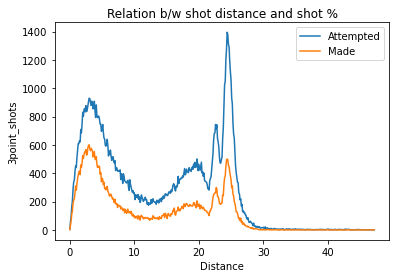

In [33]:
plt.title("Relation b/w shot distance and shot %")
plt.plot(df['SHOT_DIST'],df['FG_Attempted'],label='Attempted')
plt.plot(df['SHOT_DIST'],df['FG_Made'],label='Made')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('3point_shots')

In [34]:
#persentage of shots made
df['persentage_of_shots'] = (df['FG_Made']/df['FG_Attempted']).mul(100).round(1)
df = df.drop(['FG_Made','FG_Attempted'],axis=1)

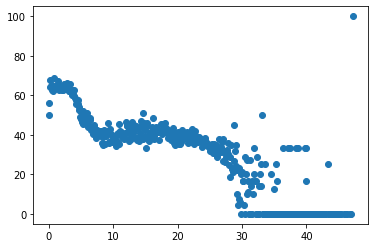

In [35]:
plt.scatter(df['SHOT_DIST'],df['persentage_of_shots'])

In [36]:
#spliting features and target

X= df.drop("persentage_of_shots",axis=1)# independent featuures
Y=df["persentage_of_shots"] # dependent features

In [59]:
#splitting testing and training data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.15,random_state=50)

In [60]:
lr = LinearRegression()

In [61]:
# training
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
#testing dataset on model and making prediction
pred = lr.predict(x_test)

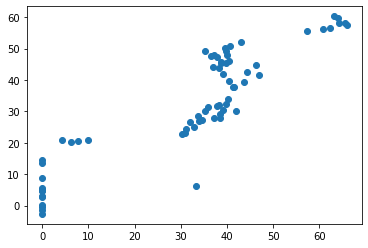

In [63]:
#plotting actual result with prediction
plt.scatter(y_test,pred)

In [64]:
#plotting acuracy score
print("Score = ",lr.score(x_test,y_test))

Score =  0.8162615711092208


In [58]:
x_test.shape

(68, 1)